In [1]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
(train, test) = tfds.load('mnist', split=['train','test'])

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [5]:
def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse_output=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = load_dataset(60000, 10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2764841445776387
Max: 244.94693302852068


In [7]:
from tensorflow.keras import layers

In [8]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())
    ])

In [9]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1086 - loss: 2.3025 - val_accuracy: 0.1102 - val_loss: 2.3022
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1117 - loss: 2.3021 - val_accuracy: 0.1102 - val_loss: 2.3019
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1128 - loss: 2.3018 - val_accuracy: 0.1102 - val_loss: 2.3017
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1102 - loss: 2.3017 - val_accuracy: 0.1102 - val_loss: 2.3016
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1108 - loss: 2.3016 - val_accuracy: 0.1102 - val_loss: 2.3015
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1121 - loss: 2.3016 - val_accuracy: 0.1102 - val_loss: 2.3014
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1122 - loss: 2.3014 - val_accuracy: 0.1102 - val_loss: 2.3013
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1117 - loss: 2.3014 - val_accuracy: 0.1102 - val_loss:

In [11]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0931 - loss: 2.3023 - val_accuracy: 0.1463 - val_loss: 2.3009
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1424 - loss: 2.3006 - val_accuracy: 0.1566 - val_loss: 2.2993
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1555 - loss: 2.2990 - val_accuracy: 0.1822 - val_loss: 2.2973
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1884 - loss: 2.2967 - val_accuracy: 0.1883 - val_loss: 2.2944
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1907 - loss: 2.2936 - val_accuracy: 0.1962 - val_loss: 2.2892
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2035 - loss: 2.2866 - val_accuracy: 0.2042 - val_loss: 2.2771
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2073 - loss: 2.2704 - val_accuracy: 0.2091 - val_loss: 2.2385
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2130 - loss: 2.2133 - val_accuracy: 0.2389 - val_loss:

In [12]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_uniform = simple_model(init, activate)
model_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2021 - loss: 2.1920 - val_accuracy: 0.4597 - val_loss: 1.6730
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5346 - loss: 1.4952 - val_accuracy: 0.7471 - val_loss: 0.9274
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7699 - loss: 0.8355 - val_accuracy: 0.8523 - val_loss: 0.5729
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8448 - loss: 0.5508 - val_accuracy: 0.8820 - val_loss: 0.4501
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8737 - loss: 0.4420 - val_accuracy: 0.8915 - val_loss: 0.3970
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8908 - loss: 0.3792 - val_accuracy: 0.9006 - val_loss: 0.3590
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9037 - loss: 0.3385 - val_accuracy: 0.9097 - val_loss: 0.3316
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9125 - loss: 0.3088 - val_accuracy: 0.9136 - val_loss

In [13]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_he = simple_model(init, activate)
model_he.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_he.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2359 - loss: 2.1703 - val_accuracy: 0.6287 - val_loss: 1.2779
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6782 - loss: 1.1030 - val_accuracy: 0.8242 - val_loss: 0.6178
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8331 - loss: 0.5886 - val_accuracy: 0.8709 - val_loss: 0.4449
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8761 - loss: 0.4309 - val_accuracy: 0.8912 - val_loss: 0.3826
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8968 - loss: 0.3590 - val_accuracy: 0.9028 - val_loss: 0.3435
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9088 - loss: 0.3094 - val_accuracy: 0.9120 - val_loss: 0.3154
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9160 - loss: 0.2839 - val_accuracy: 0.9156 - val_loss: 0.2984
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9241 - loss: 0.2582 - val_accuracy: 0.9195 - val_loss:

Text(0, 0.5, 'validation accuracy')

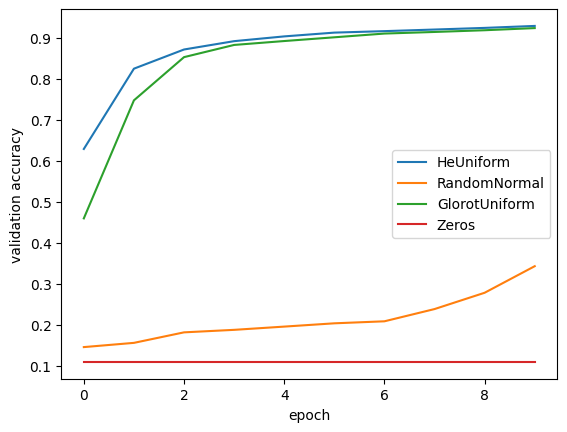

In [14]:
for i in [model_he, model_normal, model_uniform, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('epoch')
plt.ylabel('validation accuracy')

In [15]:
def simple_model_bn(initializer='he_uniform', activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())                
    ])

In [16]:
simple_model_bn().summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,130 (113.79 KB)

 Trainable params: 28,874 (112.79 KB)

 Non-trainable params: 256 (1.00 KB)

In [17]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1089 - loss: 2.3028 - val_accuracy: 0.1105 - val_loss: 2.3007
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1134 - loss: 2.3002 - val_accuracy: 0.1102 - val_loss: 2.2984
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1127 - loss: 2.2978 - val_accuracy: 0.1118 - val_loss: 2.2953
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1199 - loss: 2.2944 - val_accuracy: 0.1562 - val_loss: 2.2898
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1698 - loss: 2.2879 - val_accuracy: 0.2129 - val_loss: 2.2779
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2237 - loss: 2.2728 - val_accuracy: 0.2450 - val_loss: 2.2452
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2483 - loss: 2.2270 - val_accuracy: 0.2512 - val_loss: 2.1325
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2558 - loss: 2.0911 - val_accuracy: 0.2786 - val_loss:

In [18]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2599 - loss: 2.2475 - val_accuracy: 0.6126 - val_loss: 1.2567
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6694 - loss: 1.0552 - val_accuracy: 0.8010 - val_loss: 0.6708
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8238 - loss: 0.5985 - val_accuracy: 0.8560 - val_loss: 0.4938
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8673 - loss: 0.4468 - val_accuracy: 0.8762 - val_loss: 0.4200
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8861 - loss: 0.3791 - val_accuracy: 0.8910 - val_loss: 0.3786
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9005 - loss: 0.3331 - val_accuracy: 0.9003 - val_loss: 0.3499
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9100 - loss: 0.3009 - val_accuracy: 0.9047 - val_loss: 0.3286
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9178 - loss: 0.2793 - val_accuracy: 0.9114 - val_loss:

In [19]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4211 - loss: 1.7095 - val_accuracy: 0.8598 - val_loss: 0.5236
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8676 - loss: 0.4477 - val_accuracy: 0.9085 - val_loss: 0.3489
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9163 - loss: 0.2829 - val_accuracy: 0.9198 - val_loss: 0.3003
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9332 - loss: 0.2291 - val_accuracy: 0.9248 - val_loss: 0.2903
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9421 - loss: 0.1966 - val_accuracy: 0.9323 - val_loss: 0.2664
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9486 - loss: 0.1778 - val_accuracy: 0.9341 - val_loss: 0.2610
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9535 - loss: 0.1590 - val_accuracy: 0.9388 - val_loss: 0.2468
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9600 - loss: 0.1405 - val_accuracy: 0.9428 - val_loss

In [20]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2336 - loss: 2.2618 - val_accuracy: 0.5976 - val_loss: 1.3413
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6367 - loss: 1.1760 - val_accuracy: 0.7955 - val_loss: 0.7329
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8164 - loss: 0.6452 - val_accuracy: 0.8738 - val_loss: 0.4723
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8806 - loss: 0.4098 - val_accuracy: 0.9004 - val_loss: 0.3666
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9081 - loss: 0.3144 - val_accuracy: 0.9132 - val_loss: 0.3100
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9265 - loss: 0.2543 - val_accuracy: 0.9246 - val_loss: 0.2793
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9353 - loss: 0.2197 - val_accuracy: 0.9269 - val_loss: 0.2617
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9454 - loss: 0.1914 - val_accuracy: 0.9324 - val_loss

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
init = tf.keras.initializers.he_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data=(X_test, y_test), verbose=1)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 599us/step - accuracy: 0.8399 - loss: 0.5216 - val_accuracy: 0.9422 - val_loss: 0.2202
Epoch 2/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.9372 - loss: 0.2110 - val_accuracy: 0.9449 - val_loss: 0.2090
Epoch 3/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.9496 - loss: 0.1673 - val_accuracy: 0.9489 - val_loss: 0.1790
Epoch 4/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.9559 - loss: 0.1450 - val_accuracy: 0.9579 - val_loss: 0.1601
Epoch 5/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.9619 - loss: 0.1229 - val_accuracy: 0.9600 - val_loss: 0.1565
Epoch 6/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.9656 - loss: 0.1121 - val_accuracy: 0.9608 - val_loss: 0.1429
Epoch 7/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.9675 - loss: 0.1018 - val_accuracy: 0.9610 - val_loss: 0.1505
Epoch 8/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - ac